# Artificial Intelligence (CS6364-002) 
## Homework 2 - Question 1
## Submission by - Adithya Sundararajan Iyer (asi200000)


(Linear Regression): Write python codes in a Jupyter notebook that use the python library (sklearn.linear_model)
to train a linear regression model for the Boston housing dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

In [2]:
from sklearn.datasets import load_boston

bostonHousingDataset = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

To have a look at the dataset loaded, we look at its keys

In [5]:
datasetKeys = bostonHousingDataset.keys()
print(datasetKeys)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


Now we need to read the description to get a better understanding of the dataset

In [6]:
print(bostonHousingDataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
bostonDataframe = pd.DataFrame(bostonHousingDataset.data, columns=bostonHousingDataset.feature_names)
bostonDataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
bostonDataframe['MEDV'] = bostonHousingDataset.target
bostonDataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Pre-processing step

In [9]:
bostonDataframe.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Since there are no null or void values in the dataset, we proceed with exploratory data analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


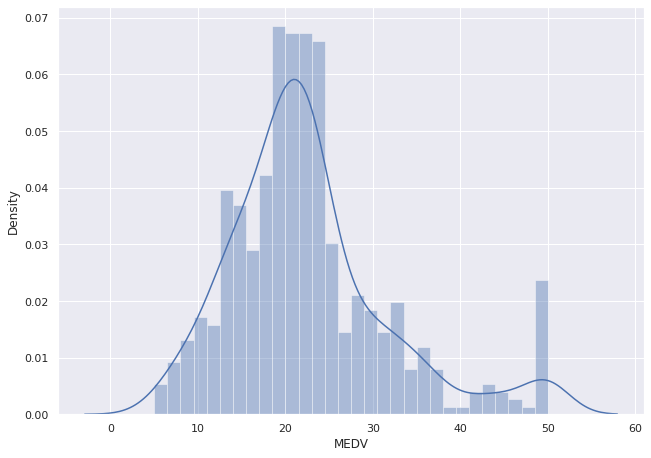

In [10]:
sns.set(rc={'figure.figsize':(10.5,7.5)})
sns.distplot(bostonDataframe['MEDV'], bins=30)
plt.show()

Mostly normal distribution, few outliers. We can also display a correlation matrix for better understanding of features' effect on the target value.

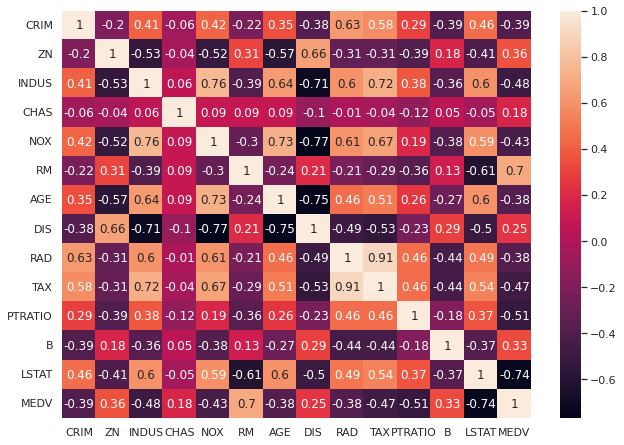

In [11]:
corrMat = bostonDataframe.corr().round(2)
sns.heatmap(corrMat, annot=True)



*   RM and LSTAT have the highest correlation, and will be chosen as part of the feature-selection process.
*   We can see their effect on our target variable MEDV using a scatter plot



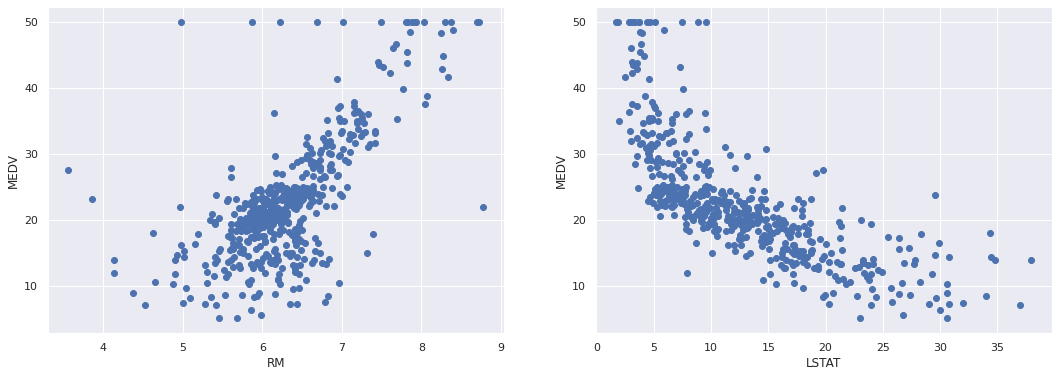

In [12]:
plt.figure(figsize=(18,6))
selectFeats = ['RM','LSTAT']

for ind, feat in enumerate(selectFeats):
  plt.subplot(1, len(selectFeats), ind+1)
  plt.scatter(bostonDataframe[feat], bostonDataframe['MEDV'])
  plt.xlabel(feat)
  plt.ylabel('MEDV')


MEDV appears to increase linearly with RM, and decrease as LSTAT grows, but not exactly linearly


Now we prepare the data for training our model by concatenating the columns for the features selected

In [13]:
xData = pd.DataFrame(np.c_[bostonDataframe['RM'], bostonDataframe['LSTAT']], columns=selectFeats)
yData = bostonDataframe['MEDV']

Split the dataset to a training set (70% samples) and a testing set (30% samples)

In [15]:
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, test_size=0.3, random_state=42)
print(xTrain.shape, xTest.shape)
print(yTrain.shape, yTest.shape)

(354, 2) (152, 2)
(354,) (152,)


Now we use the python library (sklearn.linear model) to train the linear regression model 

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Model1 = LinearRegression()
Model1.fit(xTrain, yTrain)

LinearRegression()

Now we rint the root mean squared errors (RMSE) on the training and testing sets in the Jupyter notebook.

In [17]:
yTrainPredicted = Model1.predict(xTrain)
rmseTrain = np.sqrt(mean_squared_error(yTrain, yTrainPredicted))
print('Training performance of model: RMSE =', rmseTrain)

yTestPredicted = Model1.predict(xTest)
rmseTest = np.sqrt(mean_squared_error(yTest, yTestPredicted))
print('Testing performance of model: RMSE =', rmseTest)

Training performance of model: RMSE = 5.557293000952383
Testing performance of model: RMSE = 5.46042834691954
